In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
file_path = "/content/gdrive/My Drive/Colab Notebooks/"
titanic_data = pd.read_csv(file_path + 'titanic_test_complete.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<function matplotlib.pyplot.show(close=None, block=None)>

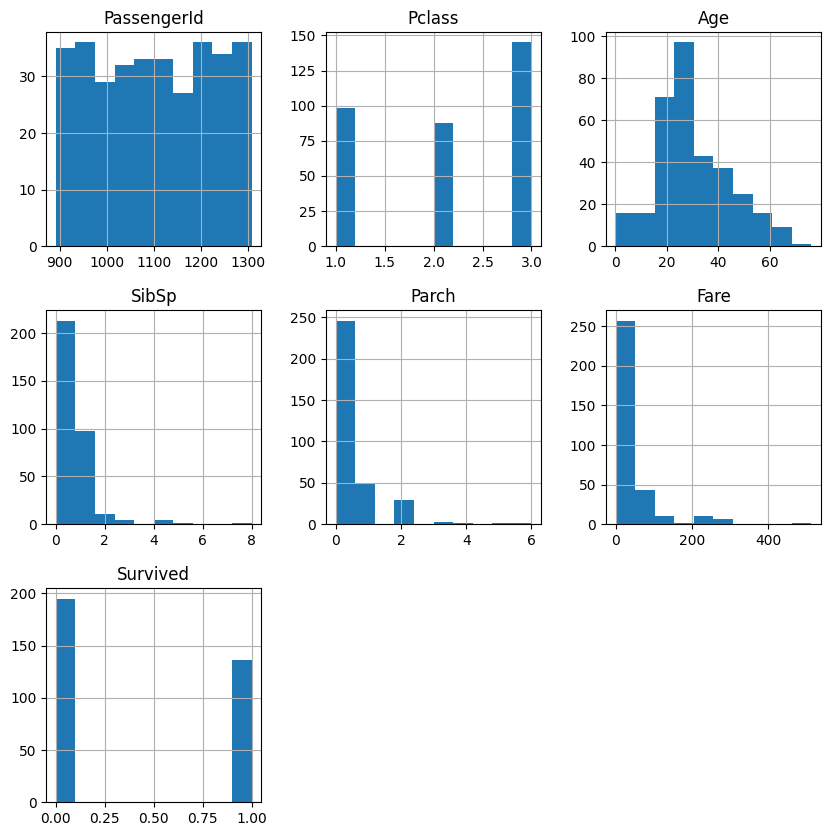

In [ ]:
titanic_data.hist(figsize=(10,10))
plt.show

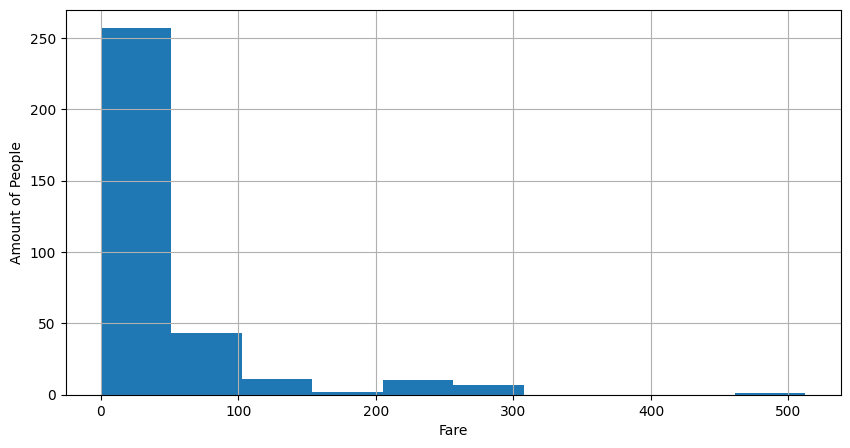

In [37]:
titanic_data['Fare'].hist(figsize=(10, 5))
plt.xlabel('Fare')
plt.ylabel('Amount of People')
plt.show()

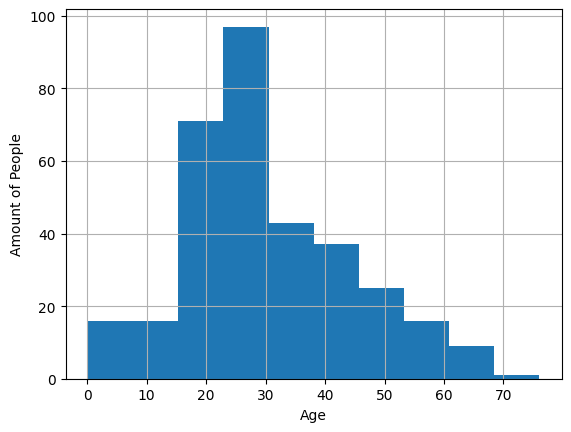

In [39]:
titanic_data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Amount of People')
plt.show()

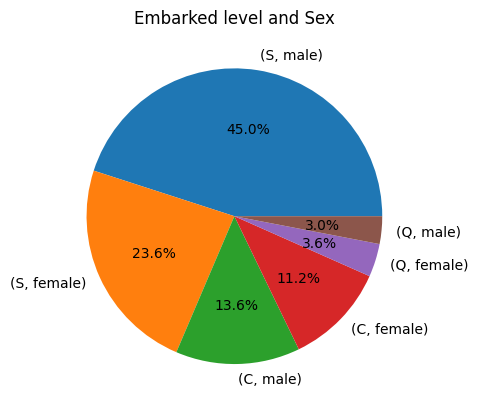

In [38]:
titanic_data[['Embarked','Sex']].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Embarked level and Sex')
plt.ylabel('')
plt.show()


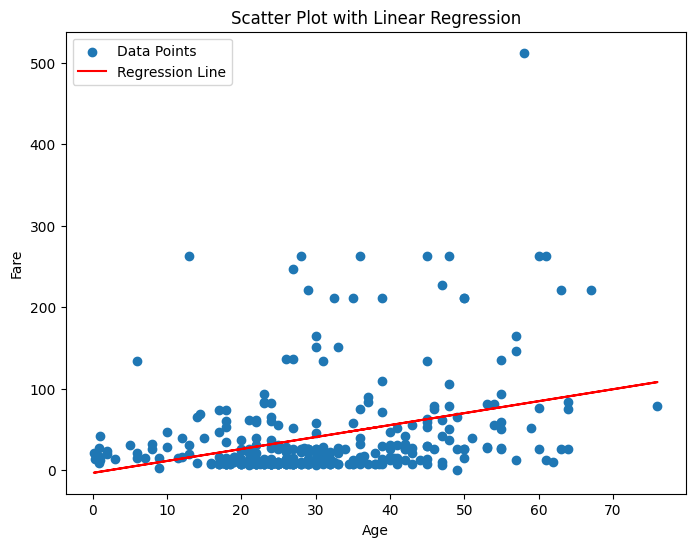

In [26]:
x = titanic_data['Age']
y = titanic_data['Fare']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot with Linear Regression')
plt.legend()

plt.show()

In [32]:
contingency_table = pd.crosstab(titanic_data['Embarked'], titanic_data['Sex'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square: ", chi2)
print("P-value: ", p)
print("DOF: ", dof)
print("Expected:  ", expected)

Sex       female  male
Embarked              
C             37    45
Q             12    10
S             78   149
Chi-square:  5.5577296812931705
P-value:  0.062108970955407926
DOF:  2
Expected:   [[ 31.46223565  50.53776435]
 [  8.44108761  13.55891239]
 [ 87.09667674 139.90332326]]


In [41]:
fare_by_embarked = titanic_data.groupby('Embarked')['Fare'].mean()
print("Average Fare by Embarked Location: ", fare_by_embarked)

age_by_class = titanic_data.groupby('Pclass')['Age'].mean()
print("Average Age by Passenger Class:", age_by_class)

Average Fare by Embarked Location:  Embarked
C    79.096850
Q    12.902464
S    29.935132
Name: Fare, dtype: float64
Average Age by Passenger Class: Pclass
1    40.918367
2    28.777500
3    23.776414
Name: Age, dtype: float64
